In [1]:
import pandas as pd
dataset=pd.read_csv('./export/dataset.csv',index_col=0)

In [69]:
df=pd.read_csv('./export/q2_2往期品类销量定价关系汇总.csv')

df['日期'] = pd.to_datetime(df['日期'])
mask = (((df['日期'] >= '2020-07-01') & (df['日期'] <= '2020-07-07')) | 
        ((df['日期'] >= '2021-07-01') & (df['日期'] <= '2021-07-07')) |
        ((df['日期'] >= '2022-07-01') & (df['日期'] <= '2022-07-07'))
       )
df = df.loc[mask]
df=df.set_index(['日期'])
result=pd.DataFrame(columns=['W_水生根茎类', 'W_花叶类', 'W_花菜类', 'W_茄类', 'W_辣椒类', 'W_食用菌'])
for typ in df['分类名称'].unique():
    df0=df[df['分类名称']==typ]
    result[f'W_{typ}']=df0['销售单价(元/千克)_否']/df0['批发价格(元/千克)_否']-1

In [76]:
w_data=pd.read_csv('./export/q2_3往期0701-0707的W分析(未打折).csv',index_col=0)
q_data=pd.read_csv('./export/q2_3往期0701-0707的Q分析(未打折).csv',index_col=0)

In [18]:
df=pd.read_csv('./export/q2_2往期品类销量定价关系汇总.csv')
df['分类名称'].unique()

array(['水生根茎类', '花叶类', '花菜类', '茄类', '辣椒类', '食用菌'], dtype=object)

In [19]:
df['日期'] = pd.to_datetime(df['日期'])
mask = (((df['日期'] >= '2020-07-01') & (df['日期'] <= '2020-07-07')) | 
        ((df['日期'] >= '2021-07-01') & (df['日期'] <= '2021-07-07')) |
        ((df['日期'] >= '2022-07-01') & (df['日期'] <= '2022-07-07'))
       )
#df = df.loc[mask]
df=df.set_index(['日期'])

In [13]:
df

,分类名称,批发价格(元/千克)_否,批发价格(元/千克)_是,销售单价(元/千克)_否,销售单价(元/千克)_是,销量(千克)_否,销量(千克)_是
日期,,,,,,,
2020-07-01,水生根茎类,8.820667,0.000000,13.973333,0.000000,4.850,0.000
2020-07-01,花叶类,5.255206,3.616563,7.877240,4.075000,191.717,13.685
2020-07-01,花菜类,8.484369,0.000000,12.834951,0.000000,46.640,0.000
2020-07-01,茄类,4.259333,0.000000,5.066667,0.000000,35.374,0.000
2020-07-01,辣椒类,6.372510,0.000000,12.379151,0.000000,76.715,0.000
...,...,...,...,...,...,...,...
2022-07-07,花叶类,3.130315,0.000000,5.580420,0.000000,134.044,0.000
2022-07-07,花菜类,5.677931,0.000000,8.000000,0.000000,50.962,0.000
2022-07-07,茄类,3.808065,0.000000,7.032258,0.000000,14.602,0.000


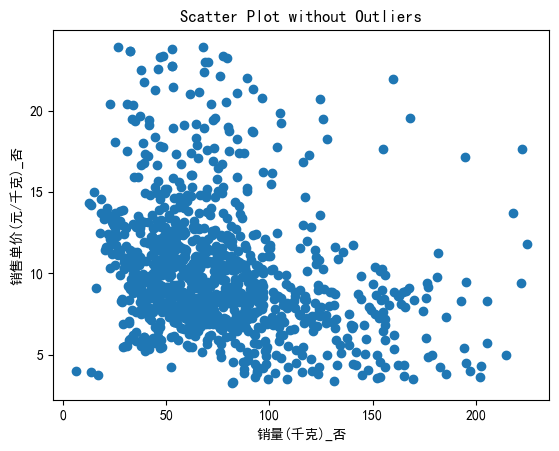

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings("ignore")
df0=df[df['分类名称']=='辣椒类']

# 计算销量和销售单价的Z-score
df0['销量_zscore'] = (df0['销量(千克)_否'] - df0['销量(千克)_否'].mean()) / df0['销量(千克)_否'].std()
df0['销售单价_zscore'] = (df0['销售单价(元/千克)_否'] - df0['销售单价(元/千克)_否'].mean()) / df0['销售单价(元/千克)_否'].std()

# 根据Z-score去除离群值
df0 = df0[(df0['销量_zscore'].abs() < 3) & (df0['销售单价_zscore'].abs() < 3)]

# 绘制散点图
plt.scatter(df0['销量(千克)_否'].values, df0['销售单价(元/千克)_否'].values)
plt.xlabel('销量(千克)_否')
plt.ylabel('销售单价(元/千克)_否')
plt.title('Scatter Plot without Outliers')
plt.show()

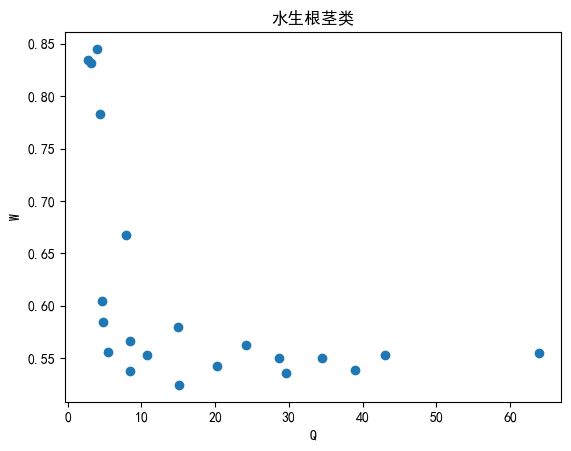

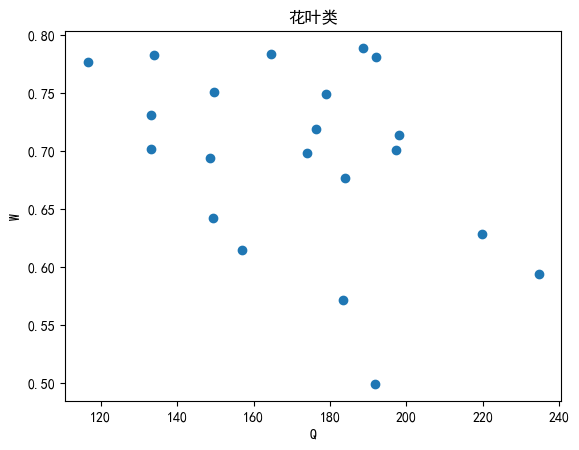

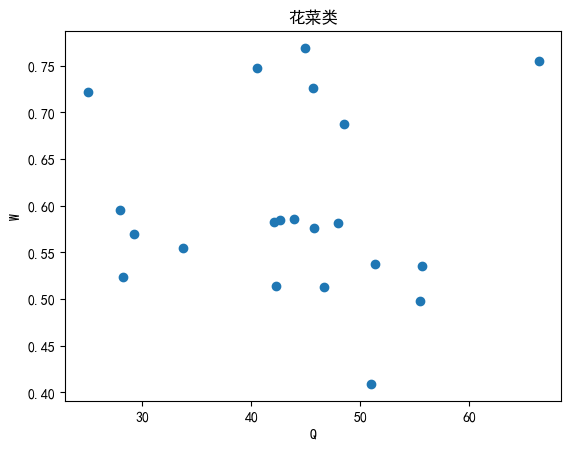

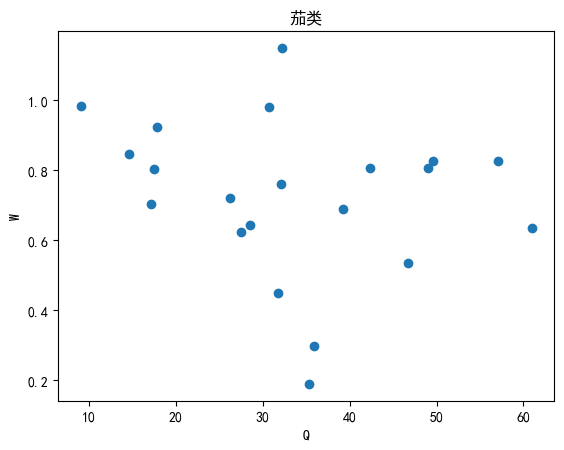

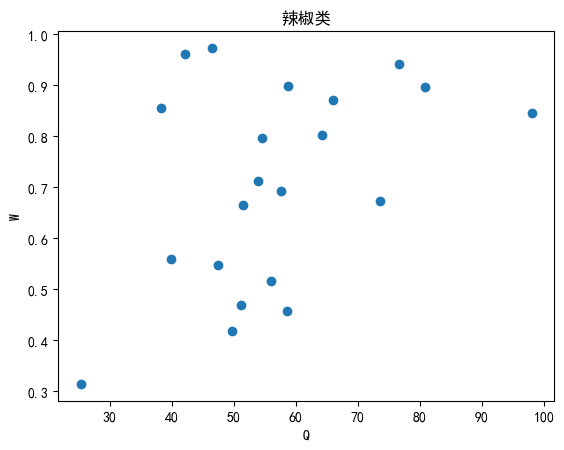

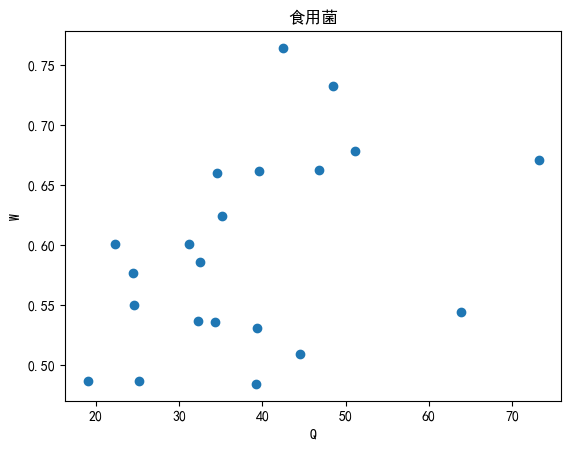

In [81]:
import pandas as pd
data = pd.read_csv('./export/q2_1往期品类批发价格汇总.csv', index_col=0)
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

for typ in df['分类名称'].unique():
    plt.title(typ)
    plt.xlabel('Q')
    plt.ylabel('W')
    plt.scatter(q_data[f'Q_{typ}'],w_data[f'W_{typ}'])
    plt.show()

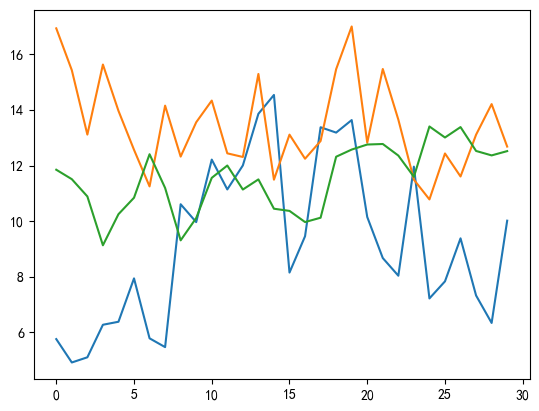

In [41]:
import pandas as pd
data = pd.read_csv('./export/q2_1往期品类批发价格汇总.csv', index_col=0)
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

data['日期']=pd.to_datetime(data['日期'])
tr1=((data.loc[(data['日期']>=pd.to_datetime('2021-06-01'))&
               (data['日期']<=pd.to_datetime('2021-06-30'))&
               (data['分类名称']=='水生根茎类')
              ])[['日期','批发价格(元/千克)']]).set_index('日期')
tr2=((data.loc[(data['日期']>=pd.to_datetime('2022-06-01'))&
               (data['日期']<=pd.to_datetime('2022-06-30'))&
               (data['分类名称']=='水生根茎类')
              ])[['日期','批发价格(元/千克)']]).set_index('日期')
tr3=((data.loc[(data['日期']>=pd.to_datetime('2023-06-01'))&
               (data['日期']<=pd.to_datetime('2023-06-30'))&
               (data['分类名称']=='水生根茎类')
              ])[['日期','批发价格(元/千克)']]).set_index('日期')
plt.plot(range(0,30),tr1['批发价格(元/千克)'].values)
plt.plot(range(0,30),tr2['批发价格(元/千克)'].values)
plt.plot(range(0,30),tr3['批发价格(元/千克)'].values)
plt.show()

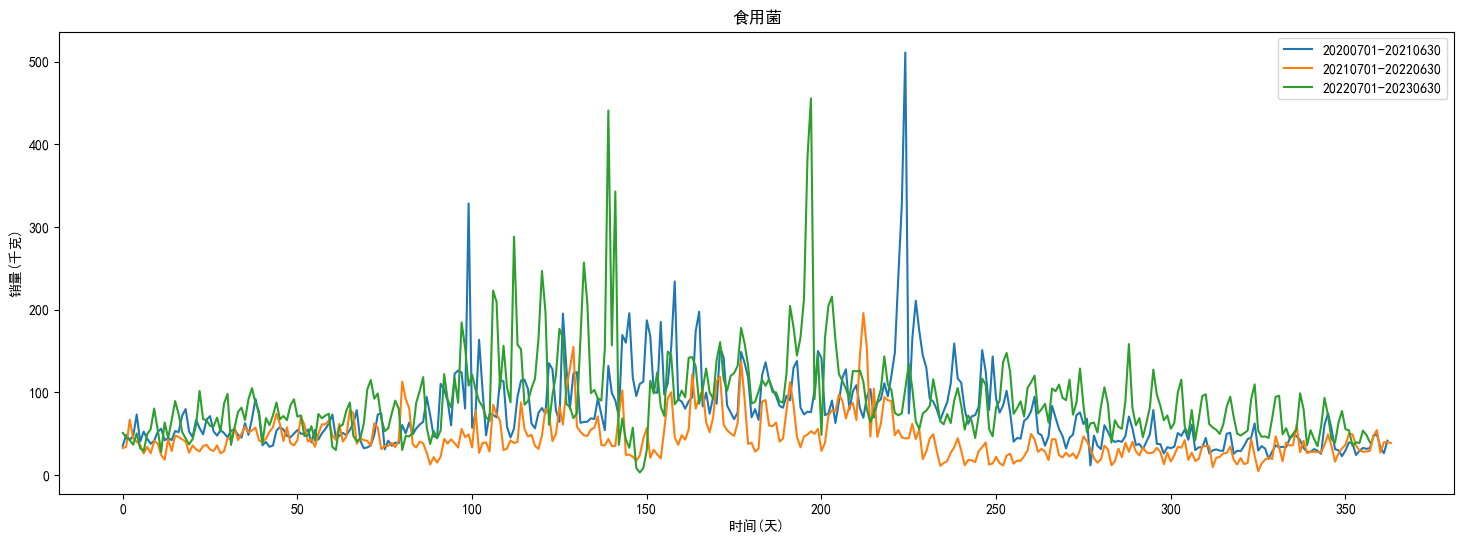

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 读取csv文件并转换为DataFrame对象
df = dataset
# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 筛选出指定品类的数据
category = '食用菌'
df_category = df.query('分类名称 == @category')

# 按年份和日期对数据进行分组，并计算每个组的销售总量
result = pd.DataFrame(df_category.groupby([df_category['日期'].dt.date])['销量(千克)'].sum())


res1=(result.loc[pd.to_datetime('2020-07-01'):pd.to_datetime('2021-06-30')].reset_index())[['销量(千克)']]
res2=(result.loc[pd.to_datetime('2021-07-01'):pd.to_datetime('2022-06-30')].reset_index())[['销量(千克)']]
res3=(result.loc[pd.to_datetime('2022-07-01'):pd.to_datetime('2023-06-30')].reset_index())[['销量(千克)']]


# 绘制折线图
plt.figure(figsize=(18,6))
plt.plot(res1)
plt.plot(res2)
plt.plot(res3)
plt.title(category)
plt.xlabel('时间(天)')
plt.ylabel('销量(千克)')
plt.legend(['20200701-20210630','20210701-20220630','20220701-20230630'])
plt.show()

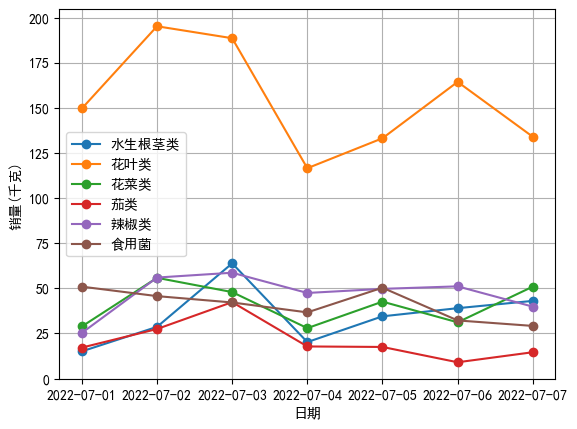

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取csv文件并转换为DataFrame对象
df = dataset

# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 筛选出每年7月1日到7月7日的数据
mask = ((df['日期'].dt.month == 7) & (df['日期'].dt.day >= 1) 
        & (df['日期'].dt.day <= 7) & (df['日期'].dt.year ==2022))
df = df.loc[mask]

# 按分类名称和日期对数据进行分组，并计算每个组的销售总量
grouped = df.groupby(['分类名称', '日期'])['销量(千克)'].sum()

# 将分组结果转换为DataFrame对象
result = grouped.reset_index()

# 绘制折线图
for name, group in result.groupby('分类名称'):
    plt.plot(group['日期'], group['销量(千克)'], label=name,marker='o')

plt.legend()
plt.grid()
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.show()